In [1]:
from pvlib import pvsystem, modelchain, location, inverter
import pandas as pd
import matplotlib.pyplot as plt

location = Location(latitude=48.01820, longitude=11.5941)

modules = pvsystem.retrieve_sam('cecmod')
module_parameters = modules['WINAICO_WSP_315M6']


array_one = pvsystem.Array(pvsystem.FixedMount(24, 210), name='South-Facing Array', 
                     albedo=None, surface_type=None, module=None, module_type=None, 
                     module_parameters=module_parameters, 
                     temperature_model_parameters=temperature_model_parameters, 
                     modules_per_string=10, strings=1, array_losses_parameters=None)
array_two = pvsystem.Array(pvsystem.FixedMount(24, 30), name='North-Facing Array', 
                     albedo=0.2, surface_type=None, module=None, module_type=None, 
                     module_parameters=module_parameters, 
                     temperature_model_parameters=temperature_model_parameters, 
                     modules_per_string=10, strings=1, array_losses_parameters=None)

#inverters = pvsystem.retrieve_sam('cecinverter')
## Fronius Primo 7.6-1 208-240
#inverter_parameters = inverters['Fronius_USA__Fronius_Primo_7_6_1_208_240__240V_']

# Generation of inverter parameters for Kostal Plenticore 7.0
# https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.inverter.fit_sandia.html
# Method as seen in test for pvlib
dc_voltage=[290.0,570.0,720.0]

dc_voltage_level=[0.1,0.2,0.3,0.5,0.75,1.0]
p_ac_0=7500
p_nt=7.6 # night time consumption

curves = pd.read_csv(r'InverterData.csv', sep= ';')
dc_power = curves['ac_power'] / curves['efficiency']
inverter_parameters = inverter.fit_sandia(ac_power=curves['ac_power'],
                                 dc_power=dc_power,
                                 dc_voltage=curves['dc_voltage'],
                                 dc_voltage_level=curves['dc_voltage_level'],
                                 p_ac_0=p_ac_0, p_nt=p_nt)


print(inverter_parameters)

system_two_arrays = PVSystem(arrays=[array_one, array_two],
                             inverter_parameters=inverter_parameters)


mc = ModelChain(system_two_arrays, location, aoi_model='no_loss',
                spectral_model='no_loss')

times = pd.date_range('2023-03-13 00:45', '2023-03-13 18:12', freq='5min', tz='Etc/GMT-1')

# Generate clearsky data using the Ineichen model, which is the default
# The get_clearsky method returns a dataframe with values for GHI, DNI, and DHI
# Zero values produced by get_clearsky at night time will cause RuntimeWarning in pvlib/tools.py: 359
weather = location.get_clearsky(times)

mc.run_model(weather)

NameError: name 'Location' is not defined

In [ ]:
for array, pdc in zip([ array_one, array_two], mc.results.dc):
    pdc.plot(title=array.name)

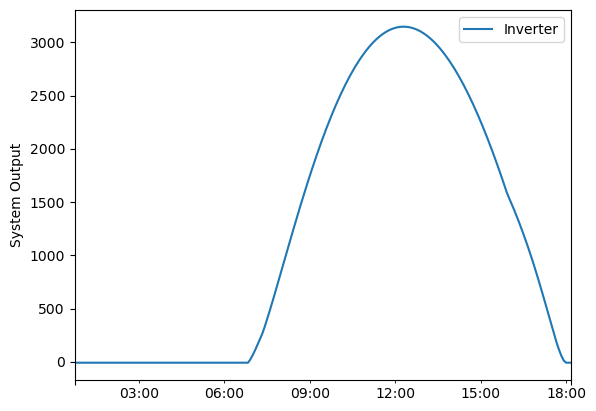

In [79]:
mc.results.ac.plot(label='Inverter')
plt.ylabel('System Output')
plt.legend()
plt.show()

In [58]:
print(inverter_parameters)

Vac                          240
Pso                    38.761692
Paco                      7600.0
Pdco                 7802.577148
Vdco                       660.0
C0                     -0.000001
C1                     -0.000028
C2                     -0.000608
C3                     -0.000576
Pnt                         2.28
Vdcmax                     800.0
Idcmax                 11.822087
Mppt_low                   100.0
Mppt_high                  800.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: Fronius_USA__Fronius_Primo_7_6_1_208_240__240V_, dtype: object


In [76]:
print (module_parameters)
type(module_parameters)

Technology            Mono-c-Si
Bifacial                      0
STC                    315.1152
PTC                       288.2
A_c                       1.663
Length                    1.665
Width                     0.999
N_s                          60
I_sc_ref                  10.16
V_oc_ref                   40.4
I_mp_ref                   9.48
V_mp_ref                  33.24
alpha_sc               0.006036
beta_oc               -0.117645
T_NOCT                     45.1
a_ref                  1.671479
I_L_ref               10.172555
I_o_ref                     0.0
R_s                    0.228189
R_sh_ref             184.660507
Adjust                22.872944
gamma_r                 -0.4309
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: WINAICO_WSP_315M6, dtype: object


pandas.core.series.Series